## Feature Importance in Decision Tree
#### For 2 features

In [3]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [4]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()

In [5]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

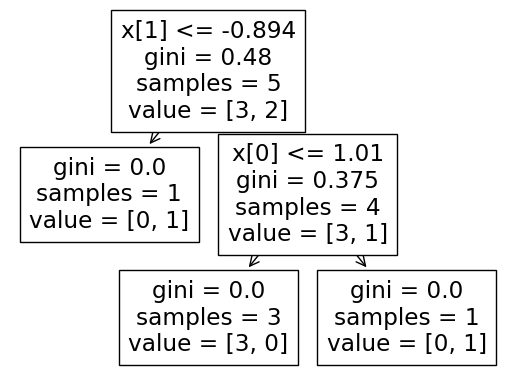

In [6]:
from sklearn.tree import plot_tree
plot_tree(clf)

## Formula used to calculate feature importance

#### Step 1: Print the Decision Tree

#### Step 2: Calculate Importance of each Node belonging to one particular feature (i = 0,1.....nth)
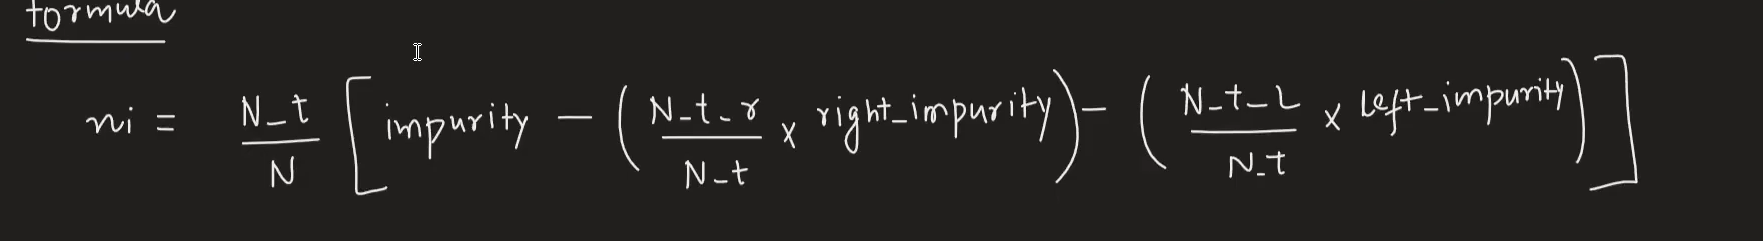

where,
N_t = Total No. of rows that Node have
N = Total No. of sample in data
impurity = gini value of that Node
N_t_r = Total No. of rows that Node's Right Child Node have
N_t_l = Total No. of rows that Node's Left Child Node have

For e.g., 
values for the first Node (which uses feat. 1 for split) in the tree above are:
N_t = 5, N = 5, impurity = 0.48, N_t_r = 4, right_impurity  = 0.375,
N_t_l = 1, left_impurity  = 0.0

Putting this values will give us nᵢ (for feat. 1) as 0.18
similarly for the next internal node (which uses feat. 0 for split)
we get nᵢ as 0.30

#### Step 3: Feature Importance  for feat. i is given by, sum of all nᵢ for one particular features divided by sum of all the nᵢ for all the features
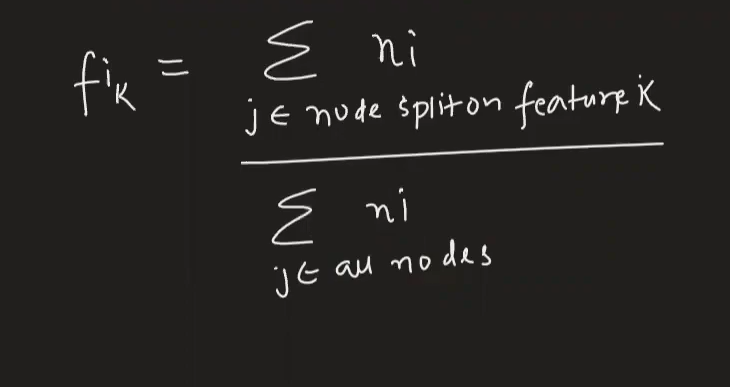

so importance of  feat.  0 is 
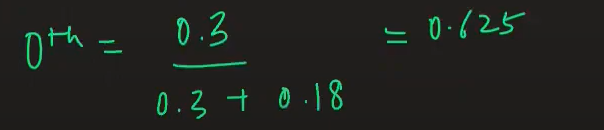
and importance of  feat. 2 is 
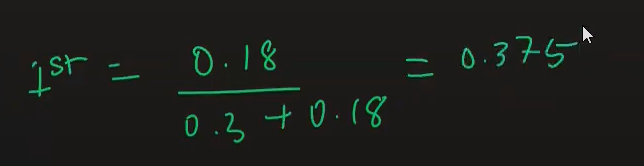

In [7]:
clf.feature_importances_

array([0.625, 0.375])

## Feature Importance in Random Forest

-- Takes the average of Importances (for a particular feature) calculated by Each Individual tree in ensemble.

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=2)
rf.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [28]:
rf.feature_importances_

array([0.47209821, 0.52790179])

In [32]:
# feature imp. calculated by Tree #1
print(rf.estimators_[0].feature_importances_)
# feature imp. calculated by Tree #2
print(rf.estimators_[1].feature_importances_)

print("Importance of feature 1: ",(0 + 0.94419643)/2)
print("Importance of feature 2: ",(1 + 0.05580357)/2)

[0. 1.]
[0.94419643 0.05580357]
Importance of feature 1:  0.472098215
Importance of feature 2:  0.527901785


### Feature Importance for more than 2 features

In [11]:
X,y = make_classification(n_samples=15, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [12]:
from sklearn.tree import DecisionTreeClassifier

In [13]:
clf = DecisionTreeClassifier()

In [14]:
clf.fit(X,y)

DecisionTreeClassifier()

[Text(0.3333333333333333, 0.875, 'x[1] <= -0.383\ngini = 0.498\nsamples = 15\nvalue = [8, 7]'),
 Text(0.16666666666666666, 0.625, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]'),
 Text(0.5, 0.625, 'x[0] <= 0.878\ngini = 0.346\nsamples = 9\nvalue = [2, 7]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.6666666666666666, 0.375, 'x[1] <= -0.278\ngini = 0.444\nsamples = 3\nvalue = [2, 1]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.8333333333333334, 0.125, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]')]

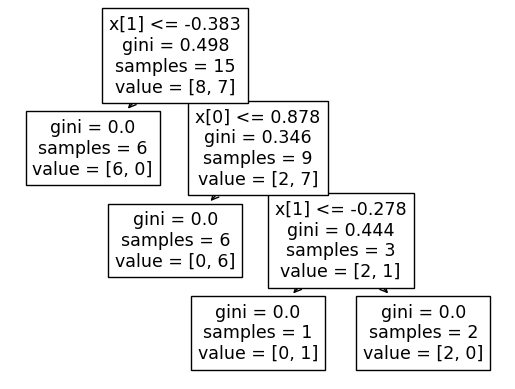

In [15]:
from sklearn.tree import plot_tree
plot_tree(clf)

Total 3 nodes
2/3 are split on feature 1
1/3 is split o feature 0

Feature importance of feat. 1 = 
We all both nᵢ for 2 nodes of feat. 1 and divide by sum of all 3 nᵢ
Feature importance of feat. 0  = 
nᵢ for single node of feat. 2 and divide by sum of all 3 nᵢ

In [16]:
clf.feature_importances_

array([0.23809524, 0.76190476])